In [2]:
journal_textwidths = {'prd': 6.50127,
                   'none': 8.5,
                   'kaobook':6.5, # just a guess
                   'issi':7.5 # just a guess
                   } # Latex's \textwidth in inches

def figsize(fraction_of_textwidth = 0.45,height_per_width  = 1 / 1.61803399,journal = 'prd'):
    textwidth = journal_textwidths[journal]
    width_in = textwidth * fraction_of_textwidth
    height_in = height_per_width * width_in
    return (width_in, height_in)


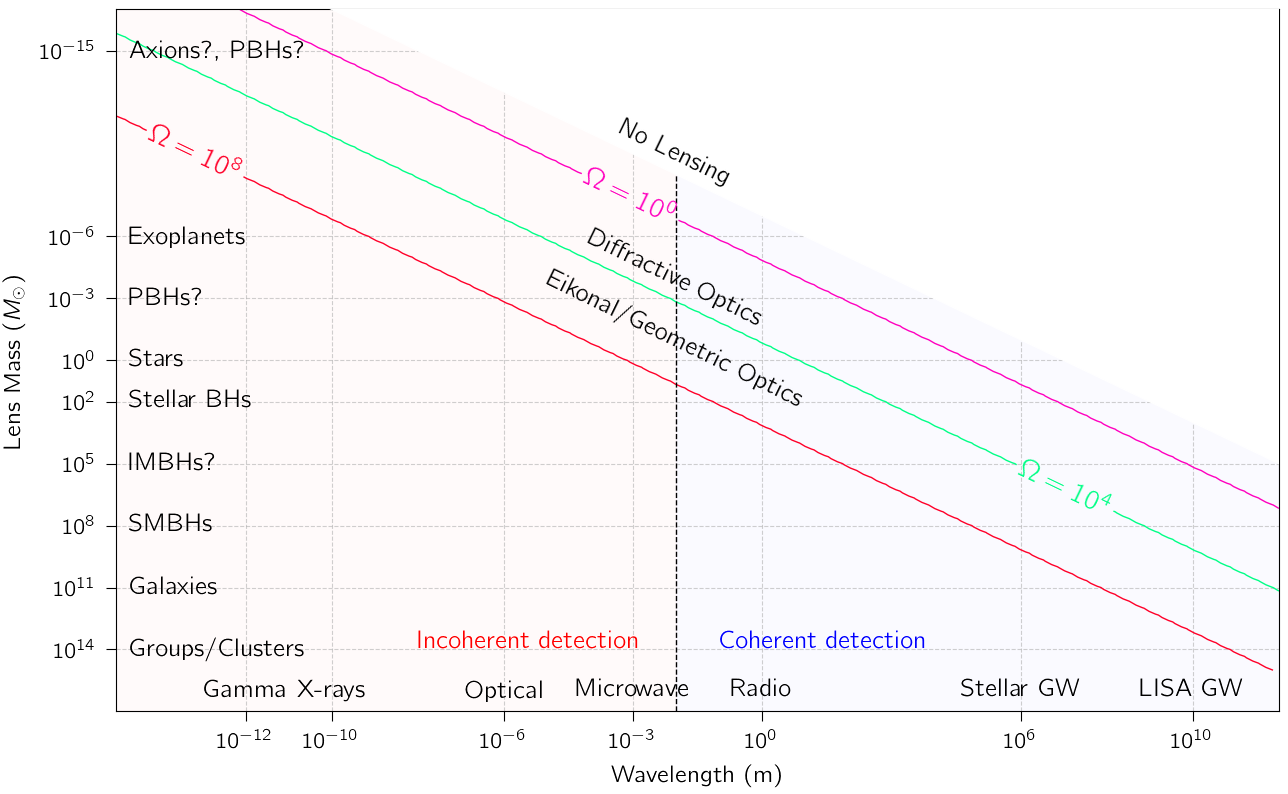

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/calvin/wave_optics_review/text/plot_scripts/paper_sty.mplstyle')
plt.figure(figsize = figsize(fraction_of_textwidth = 1, height_per_width = 0.62,journal = 'issi'))
plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.set_ylim(1e-17,1e17)
ax.invert_yaxis()
ax.set_ylabel('Lens Mass ($M_{\odot}$)')
ax.set_xlim(1e-15,1e12)
ax.set_xlabel('Wavelength (m)')

ax.axvspan(1e-2,1e15,alpha = 0.02,color = 'blue')
ax.axvspan(1e-20,1e-2,alpha = 0.02,color = 'red')
ax.axvline(x=1e-2,linestyle='--',color = 'black')
ax.text(1e-1,1e14,s = "Coherent detection",color = 'blue')
ax.text(1e-8,1e14,s = "Incoherent detection",color = 'red')
angle = -26
ax.text(1e-2,1e-1,s = "Eikonal/Geometric Optics",verticalalignment='center',horizontalalignment='center',rotation = angle)
ax.text(1e-2,1e-4,s = "Diffractive Optics",verticalalignment='center',horizontalalignment='center',rotation = angle)
ax.text(1e-2,1e-10,s = "No Lensing",verticalalignment='center',horizontalalignment='center',rotation = angle,zorder = 1001)
lambda_m = np.logspace(-18,12,num = 200)
mass_sol = np.logspace(-18,15,num = 100)
M,L = np.meshgrid(mass_sol,lambda_m)
R = 2.9e3 * M
CS = plt.contour(L,M,
             np.log10(8*np.pi*R/L),
             levels = np.array([0,4,8]),
            cmap = 'gist_rainbow_r')
#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0','1','2','>3'])
#cbar.set_label(r'$\log_{10}\Omega$', rotation=0)

def fmt(x):
    s = f'{x:.0f}'
    return rf"$\Omega = 10^" + "{" + s + "}$"

cls = ax.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=10)

def rsch2msol(x):
    return x / 2.9e3


def msol2rsch(x):
    return 2.9e3 * x

def wvl2freq(x):
    return 3e8 / x

def freq2wvl(x):
    return 3e8 / x

# X AXIS 

wvl = [1e-12,1e-10,1e-6,1e-3,1,1e6,1e10]
xtitles = ['Gamma','X-rays','Optical','Microwave','Radio','Stellar GW','LISA GW']
#ax.set_xticklabels(titles)
ax.set_xticks(wvl)
for x,xt in zip(wvl,xtitles):
    y0 = 1e16
    ax.text(x,y0,s = xt,rotation = 0,horizontalalignment = 'center',verticalalignment='center')
    
# Y AXIS
mass_sol_labels = [1e-15,1e-6,1e-3,1e0,1e2,1e5,1e8,1e11,1e14]
ytitles = ['Axions?, PBHs?','Exoplanets','PBHs?','Stars','Stellar BHs','IMBHs?','SMBHs','Galaxies','Groups/Clusters']
for y,yt in zip(mass_sol_labels,ytitles):
    x0 = 2e-15
    ax.text(x0,y,s = yt,rotation = 0,verticalalignment='center')
ax.set_yticks(mass_sol_labels)
def wvl_formatter(x, pos):
    'The two args are the value and tick position'
    return '${x}$ meters'

ax.fill_between(x = mass_sol, y2 = 1e-7 * mass_sol,y1 = 1e-30 * mass_sol,color = 'white',alpha = 1,zorder = 1000)
#ax.yaxis.set_major_formatter(FuncFormatter(wvl_formatter))
#secax = ax.secondary_yaxis('right', functions=(rsch2msol, msol2rsch))
#secax.set_ylabel('Mass $M_{\odot}$')

# yticks = [k for k in mass_scales.keys()]
# yticks.sort()
# ylabels = []
# for y in yticks:
#     exponent = f'{np.log10(y):.0f}'
#     label = '$10^{' + exponent + '}$'
#     ylabels.append(label)
# ax.set_ylabel('RSCHWARZ')
# ax.set_yticks(np.array(yticks) * 2.9e3) # convert to R_sch; these are positions
# ax.set_yticklabels(ylabels)
#plt.yticks([1e-13,1e-7,1e-4,1e-1,1e2,1e5,1e8,1e10,1e15])

#ax.set_xticklabels([2e-13,1e-10,1e-8,1e-3,1,1e6,1e9,1e11])
plt.savefig('/home/calvin/wave_optics_review/text/figs/regimes.pdf',dpi = 300)

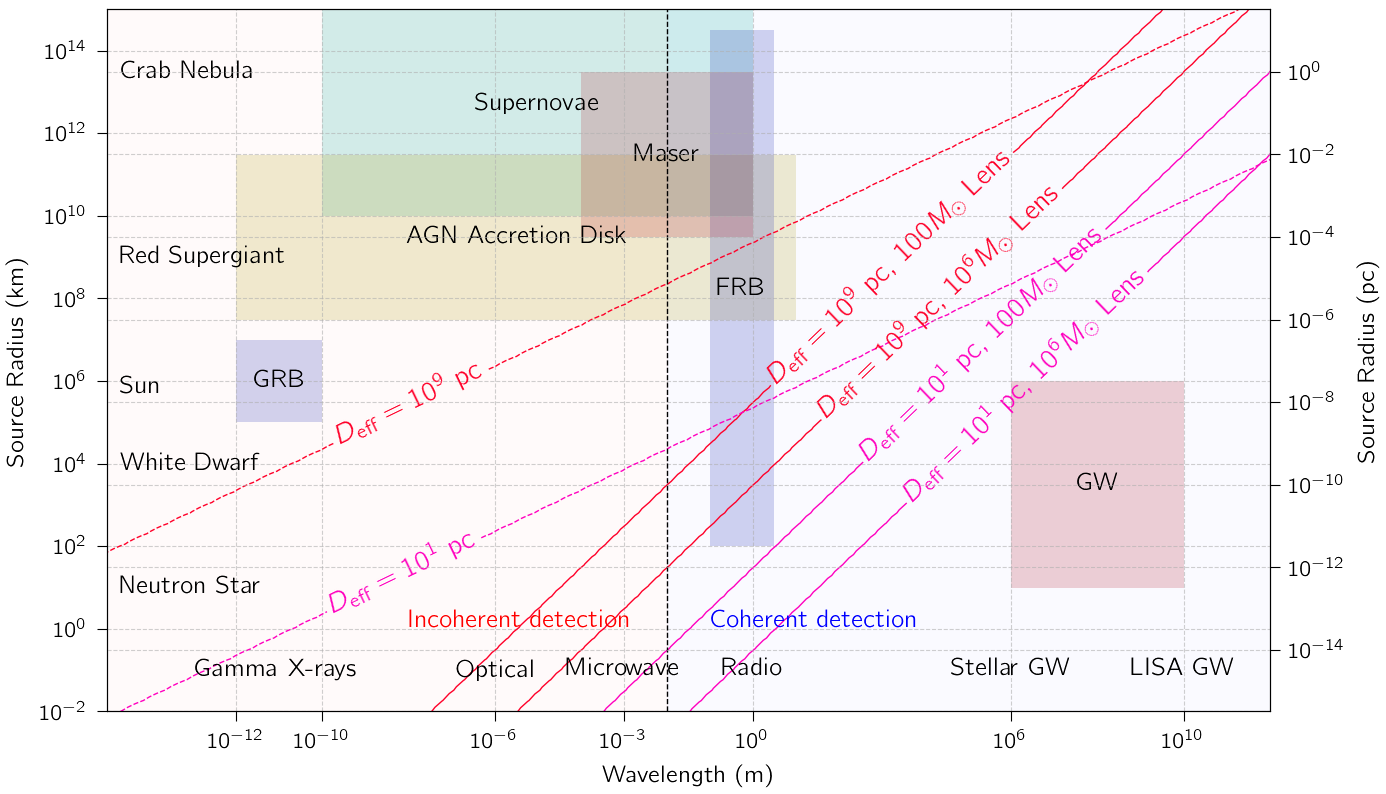

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('/home/calvin/wave_optics_review/text/plot_scripts/paper_sty.mplstyle')
plt.figure(figsize = figsize(fraction_of_textwidth = 1, height_per_width = 0.62,journal = 'issi'))
plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.set_ylim(1e-2,1e15)
km_per_parsec = 3.08567758e13

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.set_ylim(1e-2 / km_per_parsec, 1e15 / km_per_parsec)
ax2.set_ylabel('AppaSource Radius (pc)')

ax.set_ylabel('AppaSource Radius (km)')
ax.set_xlim(1e-15,1e12)
ax.set_xlabel('Wavelength (m)')

ax.axvspan(1e-2,1e15,alpha = 0.02,color = 'blue')
ax.axvspan(1e-20,1e-2,alpha = 0.02,color = 'red')
ax.axvline(x=1e-2,linestyle='--',color = 'black')
ax.text(1e-1,1e0,s = "Coherent detection",color = 'blue')
ax.text(1e-8,1e0,s = "Incoherent detection",color = 'red')
angle = -26
lambda_m = np.logspace(-18,15,num = 200)
radius_km = np.logspace(-3,22,num = 100)

L,R = np.meshgrid(lambda_m,radius_km)

# R_src / D < lambda / R_E / 2 / pi : applies in eikonal regime.
# R_E = sqrt(R_Sch * D_eff)
# R_src < D * L / sqrt(R_Sch * D) = Lambda * sqrt(D / R_schw)
# Solve for D = (2 * pi * R_src / Lambda)^2 * R_schw

R_schw_100sun = 2.9e2 #kilometers; for a 10^-3 solar mass object
CS_eik_1msol = ax.contour(L,R,
                 np.log10(R_schw_100sun * (2*np.pi*1e-3 * R / L)**2),
              levels = np.array([1,9]),
              cmap = 'gist_rainbow_r'
                 )
def fmt(x):
    s = f'{x:.0f}'
    return r"$D_\mathrm{eff} = 10^" + "{" + s + "}$ pc, $100 M_{\odot}$ Lens"

cls = ax.clabel(CS_eik_1msol, CS_eik_1msol.levels, inline=True, fmt=fmt, fontsize=10)

R_schw_million_msol = 2.9e6 #kilometers
CS_eik_10_6_msol = ax.contour(L,R,
                 np.log10(R_schw_million_msol * (2*np.pi*1e-3 * R / L)**2),
              levels = np.array([1,9]),
              cmap = 'gist_rainbow_r'
                 )
def fmt(x):
    s = f'{x:.0f}'
    return r"$D_\mathrm{eff} = 10^" + "{" + s + "}$ pc, $10^6 M_{\odot}$ Lens"

cls = ax.clabel(CS_eik_10_6_msol, CS_eik_10_6_msol.levels, inline=True, fmt=fmt, fontsize=10)

# R_src = sqrt(Lambda * Distance) : applies in wave optics regime.
# solve for D = R^2 / Lambda
CS_wave = ax.contour(L,R,
             np.log10(R**2 / (L / 1000 / 2 / np.pi) / km_per_parsec), # D = R^2 / L
             levels = np.array([1,9]),linestyles = 'dashed',
            cmap = 'gist_rainbow_r',
            
                    )
# alternatively, R = sqrt(Lambda * Distance)
#plt.plot(lambda_m,np.sqrt(lambda_m * 1e-3 * (10 * km_per_parsec)),
#        color = 'C0',label = '$D = 1$ pc')
#plt.plot(lambda_m,np.sqrt(lambda_m * 1e-3 * (1e4 * km_per_parsec)),
#        color = 'C1',label = '$D = 10^4$ pc')
#plt.plot(lambda_m,np.sqrt(lambda_m * 1e-3 * (1e9 * km_per_parsec)),
#        color = 'C2',label = '$D = 10^9$ pc')
#plt.legend(loc = 'upper right')
def fmt(x):
    s = f'{x:.0f}'
    return r"$D_\mathrm{eff} = 10^" + "{" + s + "}$ pc"

cls = ax.clabel(CS_wave, CS_wave.levels, inline=True, fmt=fmt, manual = [(1e-8,10),(1e-8,10**5.5)],
                fontsize=10)

#cbar = plt.colorbar()
#cbar.ax.set_yticklabels(['0','1','2','>3'])
#cbar.set_label(r'$\log_{10}\Omega$', rotation=0)



def rsch2msol(x):
    return x / 2.9e3

def msol2rsch(x):
    return 2.9e3 * x

def wvl2freq(x):
    return 3e8 / x

def freq2wvl(x):
    return 3e8 / x

# X AXIS 

wvl = [1e-12,1e-10,1e-6,1e-3,1,1e6,1e10]
xtitles = ['Gamma','X-rays','Optical','Microwave','Radio','Stellar GW','LISA GW']
#ax.set_xticklabels(titles)
ax.set_xticks(wvl)
for x,xt in zip(wvl,xtitles):
    y0 = 1e-1
    ax.text(x,y0,s = xt,rotation = 0,horizontalalignment = 'center',verticalalignment='center')
    
# Y AXIS
ytitles = ['Neutron Star', # horiz band: 10 km; radio to X-ray
           'White Dwarf', # 7000 km
           'Sun', # 6e5 km
           'Red Supergiant', # 1e9 km
           'Crab Nebula', # 1.6 parsec
           #'Dwarf Galaxy', # 200 kpc for MW; radio to gamma
           #'Galaxy Cluster' # 10 Mpc for Coma; radio to gamma
       ]
radius_km_labels = [10,
                    1e4,
                    7e5,
                    1e9,
                    1 * km_per_parsec,
                    100 * km_per_parsec, 
                    1e6 * km_per_parsec]


for y,yt in zip(radius_km_labels,ytitles):
    x0 = 2e-15
    ax.text(x0,y,s = yt,rotation = 0,verticalalignment='center')
#ax.set_yticks(radius_km_labels)

boxes = {#xmin xmax ymin ymax [angle, optional]
         'GRB': [1e-10,1e-12,1e5,1e7], #
         'GW': [1e6, 1e10, 10,1e6], # LIGO band min wvl, LISA band max wvl, LIGO band merger, LISA band WD merger.
         'Supernovae' : [1e-10,1,1e10,100 * km_per_parsec], # ?, ?, 1 light-day across, 1 parsec across (SN remnant).
         'AGN Accretion Disk' : [1e-12,10,3e7,3e11], # ask Prasenjit?, ask Prasenjit, 
                                                    #10 r_schwarz for 1e6 Msol black hole, 100 r_schwarz for 1e9 Msol black hole: https://iopscience.iop.org/article/10.1088/0004-637X/709/1/278
         'FRB': [0.1,3,100,10*km_per_parsec], # LOFAR 110 MHz, 8 GHz FRB 121102, NS surface size, scattering disk size.
         #'Sub-mm Galaxy' : [1e-3,1e-5,200e2 * km_per_parsec,200e4 * km_per_parsec],
         'Maser' : [1e-4, 1,.0001 * km_per_parsec, 1 * km_per_parsec]
        }
from matplotlib.patches import Rectangle
def draw_src(key):
    box = boxes[key]
    if len(box) == 4:
        angle = 0
    else:
        angle = box[4]
    ax.text(x = np.sqrt(box[0] * box[1]),
            y = np.sqrt(box[2] * box[3]),
            s = key,
            horizontalalignment = 'center',
            verticalalignment = 'center',
            rotation = angle)
    ax.fill_between(x = [box[0],box[1]],y1 = [box[2],box[2]],
                                         y2 = [box[3],box[3]],
                     alpha = 0.2
                    )
    #ax.add_patch(Rectangle((box[0], box[2]), box[1] - box[0], box[3] - box[2],angle = angle))


for src in boxes.keys():
    draw_src(src)
def wvl_formatter(x, pos):
    'The two args are the value and tick position'
    return '${x}$ meters'

#ax.fill_between(x = mass_sol, y2 = 1e-7 * mass_sol,y1 = 1e-30 * mass_sol,color = 'white',alpha = 1,zorder = 1000)
#ax.yaxis.set_major_formatter(FuncFormatter(wvl_formatter))
#secax = ax.secondary_yaxis('right', functions=(rsch2msol, msol2rsch))
#secax.set_ylabel('Mass $M_{\odot}$')

# yticks = [k for k in mass_scales.keys()]
# yticks.sort()
# ylabels = []
# for y in yticks:
#     exponent = f'{np.log10(y):.0f}'
#     label = '$10^{' + exponent + '}$'
#     ylabels.append(label)
# ax.set_ylabel('RSCHWARZ')
# ax.set_yticks(np.array(yticks) * 2.9e3) # convert to R_sch; these are positions
# ax.set_yticklabels(ylabels)
#plt.yticks([1e-13,1e-7,1e-4,1e-1,1e2,1e5,1e8,1e10,1e15])

#ax.set_xticklabels([2e-13,1e-10,1e-8,1e-3,1,1e6,1e9,1e11])
plt.savefig('/home/calvin/wave_optics_review/text/figs/src_regimes.pdf',dpi = 300)